In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("abalone.data", header=None)
data.columns = ['sex', 'length','diameter','height','whole_weight','shucked_weight','visceral_weight','shell_weight','rings']
data.shape

(4177, 9)

In [ ]:
data.head()

In [ ]:
data.describe()

In [7]:
corr_matrix = data.corr()
corr_matrix

,length,diameter,height,whole_weight,shucked_weight,visceral_weight,shell_weight,rings
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
visceral_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
corr_matrix["rings"].sort_values(ascending=False)

rings              1.000000
shell_weight       0.627574
diameter           0.574660
height             0.557467
length             0.556720
whole_weight       0.540390
visceral_weight    0.503819
shucked_weight     0.420884
Name: rings, dtype: float64

C:\Users\leele\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002396A5FB828>,
      dtype=object)

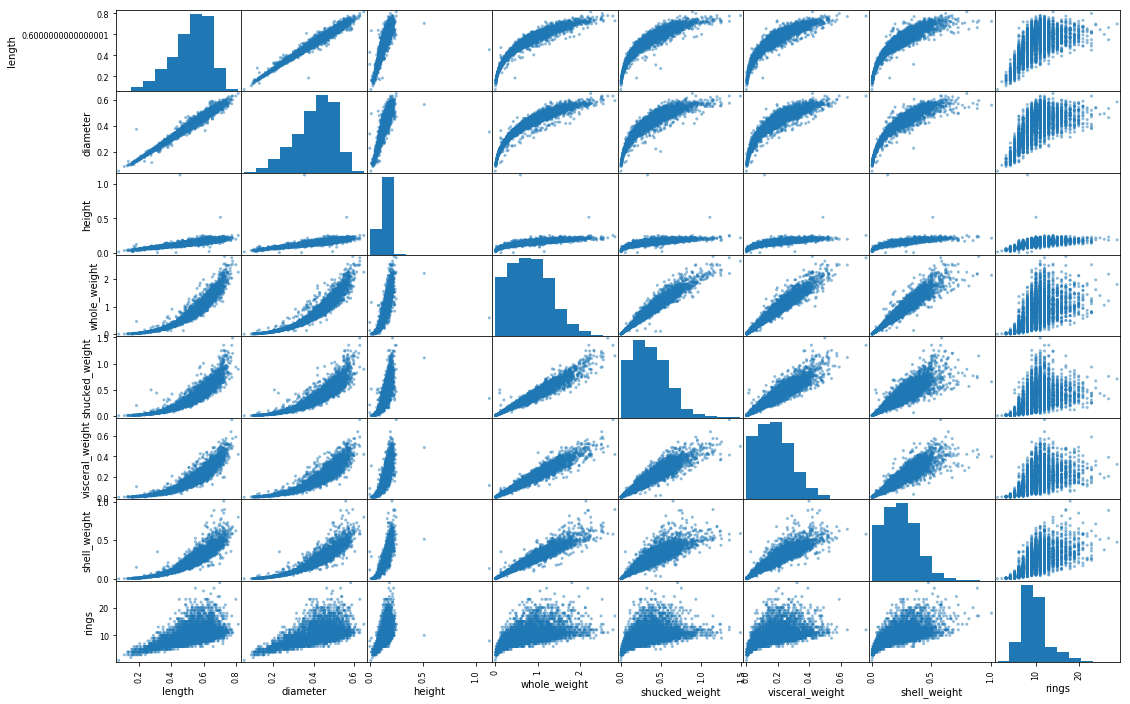

In [6]:

pd.scatter_matrix(data, figsize=(18, 12))


In [10]:
#drop length and whole_weight (doesn't add much)
data = data.drop(["length","whole_weight"],axis=1)
data.head()

,sex,diameter,height,shucked_weight,visceral_weight,shell_weight,rings
0,M,0.365,0.095,0.2245,0.1010,0.150,15
1,M,0.265,0.090,0.0995,0.0485,0.070,7
2,F,0.420,0.135,0.2565,0.1415,0.210,9
3,M,0.365,0.125,0.2155,0.1140,0.155,10
4,I,0.255,0.080,0.0895,0.0395,0.055,7


In [11]:
#separate out the training data and test data
X, Y = data.drop("rings",axis=1), data["rings"].copy()
train_data, train_labels = X.iloc[:3133,:], Y.iloc[:3133]
test_data, test_labels = X.iloc[3133:,:], Y.iloc[3133:]
test_data.shape

(1044, 6)

In [12]:
#restart test_data/test_label index at 0 to make standardization work correctly
test_data['new_index']=test_data.index-test_data.index[0]
test_data.set_index('new_index',inplace=True)

test_labels=pd.DataFrame(test_labels)
test_labels['new_index'] = test_labels.index - test_labels.index[0]
test_labels.set_index('new_index',inplace=True)


C:\Users\leele\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


One hot encoding followed by standardization means we even standardized the binary variables...does this impact anything?

In [14]:
#Standarization for the TRAIN data 

#one hot encoding to 'sex' feature
train_data = pd.concat([train_data, pd.get_dummies(train_data['sex'], prefix='sex')], axis=1).drop("sex", axis=1) 

#standarize all numerical data
from sklearn import preprocessing

x = train_data.values #returns a numpy array
x_scaled = preprocessing.scale(x)
train_data = pd.DataFrame(x_scaled)
train_data.columns = ['diameter','height','shucked_weight','visceral_weight','shell_weight','sex_F', 'sex_I', 'sex_M']

train_data.head()

KeyError: 'sex'

In [38]:
#Standarization for the TEST data 

#one hot encoding to 'sex' feature
test_data = pd.concat([test_data, pd.get_dummies(test_data['sex'], prefix='sex')], axis=1).drop("sex", axis=1) 

#standarize all numerical data

x = test_data.values #returns a numpy array
x_scaled = preprocessing.scale(x)
test_data = pd.DataFrame(x_scaled)
test_data.columns = ['diameter','height',,'shucked_weight','visceral_weight','shell_weight','sex_F', 'sex_I', 'sex_M']

test_data.head()

,length,diameter,height,whole_weight,shucked_weight,visceral_weight,shell_weight,sex_F,sex_I,sex_M
0,-0.366454,-0.217071,-1.061553,-0.590979,-0.654172,-0.630524,-0.426064,1.464438,-0.690407,-0.748691
1,-0.579139,-0.526875,-0.399114,-0.610750,-0.677423,-0.676693,-0.389003,-0.682856,-0.690407,1.335665
2,-0.579139,-0.630143,-0.399114,-0.674226,-0.807624,-0.639758,-0.426064,-0.682856,-0.690407,1.335665
3,0.058916,0.092733,-0.399114,-0.159138,-0.233344,-0.307342,0.166908,-0.682856,-0.690407,1.335665
4,-0.536602,-0.526875,-0.929065,-0.733539,-0.809949,-0.916771,-0.389003,-0.682856,-0.690407,1.335665


Text(0, 0.5, 'Testing Accuracy')

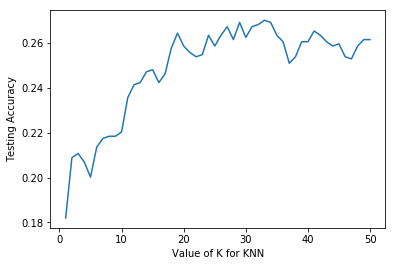

In [40]:
#train data!

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#run from k=1 throgh 50 and record test accuracy
k_range = range(1,51)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    test_pred = knn.predict(test_data)
    scores[k] = metrics.accuracy_score(test_labels,test_pred)
    scores_list.append(metrics.accuracy_score(test_labels,test_pred))
    
#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [49]:
#exam k=20 

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_data, train_labels)
test_pred = pd.DataFrame(knn.predict(test_data),columns=['predict']).join(test_labels)
test_pred['diff'] = test_pred['rings'] - test_pred['predict']
test_pred.describe()

,predict,rings,diff
count,1044.000000,1044.000000,1044.00000
mean,8.931992,9.999042,1.06705
std,2.004351,3.066692,2.33061
min,4.000000,3.000000,-4.00000
25%,8.000000,8.000000,0.00000
50%,9.000000,10.000000,1.00000
75%,10.000000,11.000000,2.00000
max,17.000000,24.000000,14.00000


In [51]:
test_pred['diff'].value_counts()

 0     270
 1     205
-1     154
 2     131
 3      66
-2      58
 4      44
 5      36
 6      25
-3      15
 8      12
 7      11
-4       6
 9       6
 10      3
 11      1
 14      1
Name: diff, dtype: int64

In [52]:
270/1044


0.25862068965517243